## Anemia Prediction with Machine Learning

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [16]:
df = pd.read_csv('/Users/simarmalhan/Downloads/anemia_dataset.csv')
df.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(104, 14)

In [20]:
df.isnull().sum()

Number            0
Name              0
%Red Pixel        0
%Green pixel      0
%Blue pixel       0
Hb                0
Anaemic           0
Unnamed: 7      104
Unnamed: 8      104
Unnamed: 9      104
Unnamed: 10     104
Unnamed: 11     104
Unnamed: 12     104
Unnamed: 13     103
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Name          104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
 7   Unnamed: 7    0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   1 non-null      object 
dtypes: float64(10), int64(1), object(3)
memory usage: 11.5+ KB


In [26]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,104.000000,104.000000,104.000000,104.000000,104.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,52.500000,45.654175,28.875507,25.470325,12.150962,NaN,NaN,NaN,NaN,NaN,NaN
std,30.166206,2.816294,1.554275,1.984671,2.512957,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,38.796800,25.140300,19.541300,2.800000,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.750000,43.911375,27.871300,24.896425,10.650000,NaN,NaN,NaN,NaN,NaN,NaN
50%,52.500000,45.385350,28.948750,25.953200,12.600000,NaN,NaN,NaN,NaN,NaN,NaN
75%,78.250000,46.968325,29.887275,26.721600,14.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,104.000000,54.647800,32.368100,29.841400,16.300000,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing

In [29]:
# drop unneccessary columns
df.drop(columns=['Name','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)

### EDA

In [32]:
df.head()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,Yes
1,2,45.6033,28.1900,26.2067,13.5,No
2,3,45.0107,28.9677,26.0215,11.7,No
3,4,44.5398,28.9899,26.4703,13.5,No
4,5,43.2870,30.6972,26.0158,12.4,No


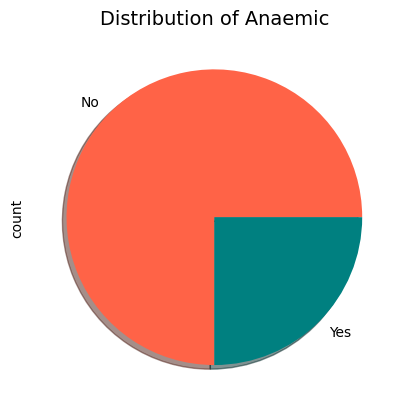

In [42]:
df['Anaemic'].value_counts().plot(kind = 'pie', colors = ['tomato', 'teal'], shadow = True)
plt.title('Distribution of Anaemic', fontsize=14)
plt.show()

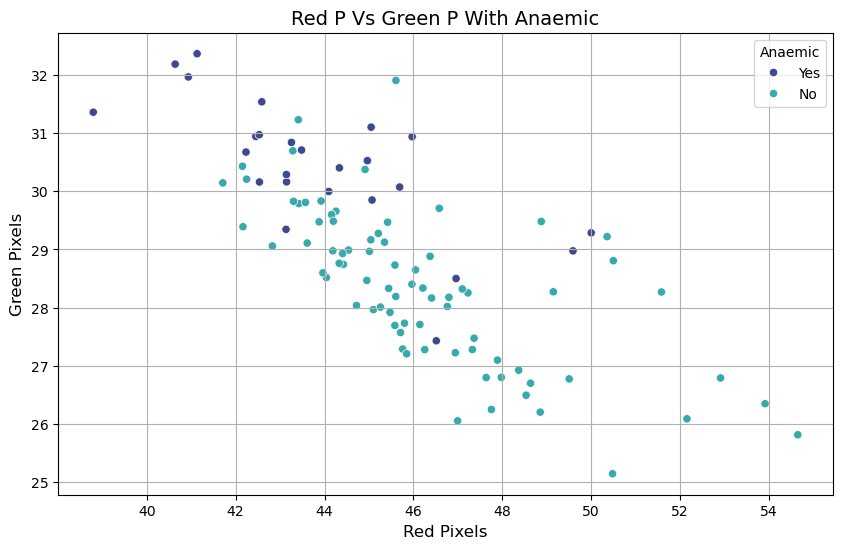

In [44]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = df['%Red Pixel'], y = df['%Green pixel'], hue = df['Anaemic'], palette = 'mako')
plt.title('Red P Vs Green P With Anaemic', fontsize=14)
plt.xlabel('Red Pixels', fontsize=12)
plt.ylabel('Green Pixels', fontsize=12)

plt.grid()
plt.show()

The scatter plot shows that as the percentage of green pixels decreases and the percentage of red pixels increases, there are more points labeled as "Yes" for anaemia (darker blue). This suggests a trend where higher red pixel percentages and lower green pixel percentages are associated with anaemia.

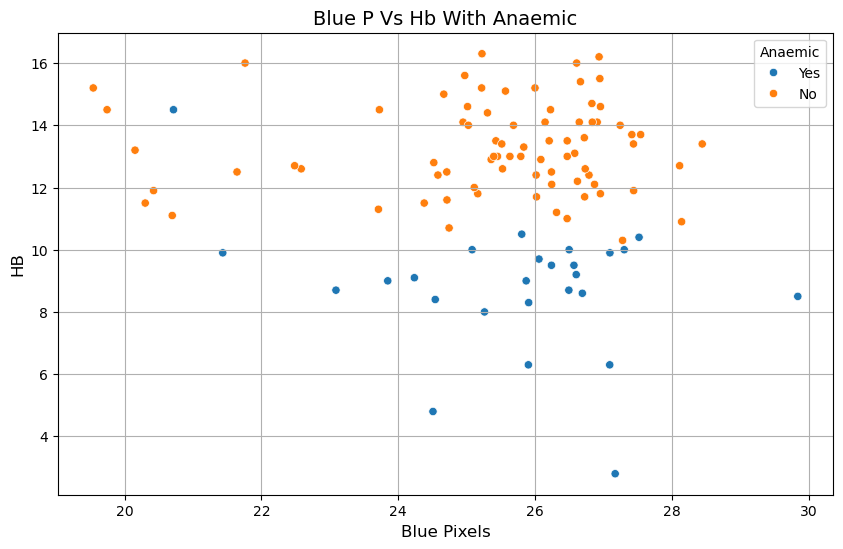

In [48]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = df['%Blue pixel'], y = df['Hb'], hue = df['Anaemic'])
plt.title('Blue P Vs Hb With Anaemic', fontsize=14)
plt.xlabel('Blue Pixels', fontsize=12)
plt.ylabel('HB', fontsize=12)

plt.grid()
plt.show()

There does not appear to be a visible pattern when Blue Pixel Percentage and Hb are seen together. However, it does confirm the medical understanding that the lower the Hb levels, more the chances of a person being anaemic.

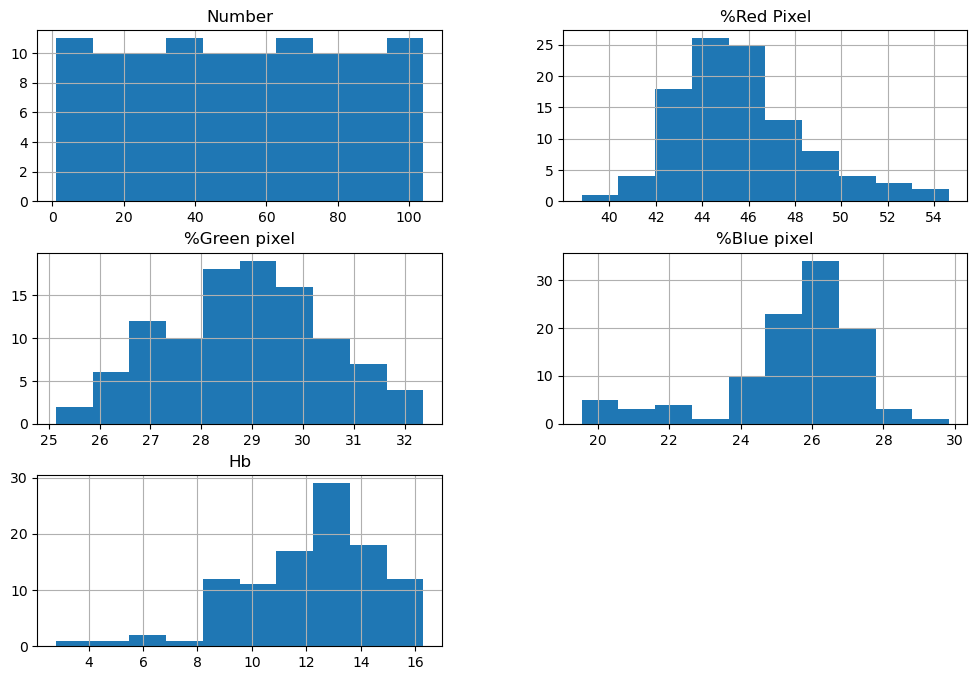

In [53]:
df.hist(figsize=(12,8))
plt.show()

<Axes: >

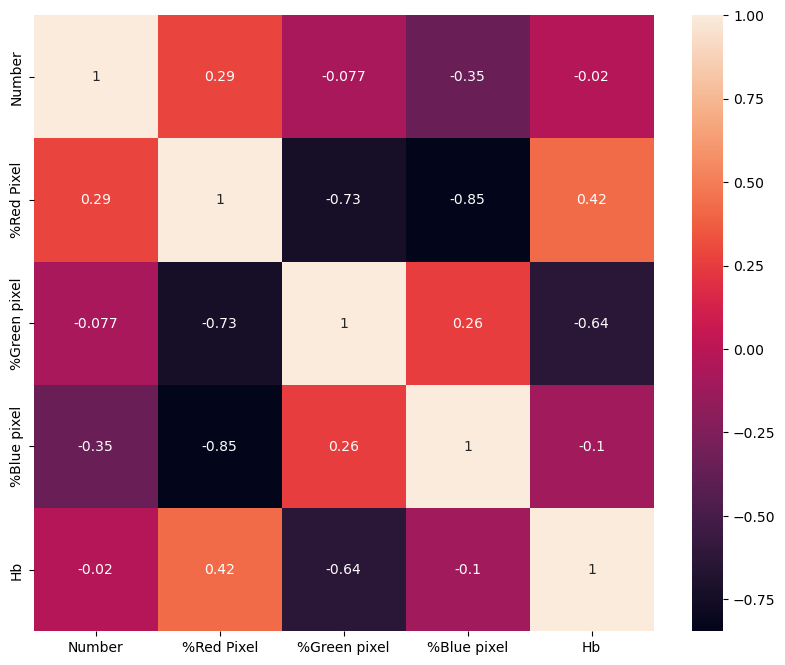

In [59]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(numeric_only = True), annot = True)

Based on this correlation heatmap:

**1. Strong negative correlation between Red and Blue pixels (-0.85):** As red pixel percentage increases, blue pixel percentage strongly decreases.

**2. Strong negative correlation between Red and Green pixels (-0.73):** Red and green pixel percentages have an inverse relationship.
**3. Moderate positive correlation between Red pixels and Hb (0.42):** Higher hemoglobin levels are associated with higher red pixel percentages, supporting your earlier observation.

**4. Strong negative correlation between Green pixels and Hb (-0.64):** Higher green pixel percentages correspond to lower hemoglobin levels.

**5. Weak relationships with Blue pixels and Hb (-0.1):** Blue pixels have minimal correlation with hemoglobin.

This confirms our earlier observation: as red pixel percentage increases and green pixel percentage decreases, hemoglobin levels tend to be higher (indicating less likelihood of anemia).

These relationships suggest that red and green pixel percentages could be useful features for predicting anemia, with red pixels being particularly valuable as a positive indicator of hemoglobin levels.

### Label Encoding

In [71]:
le = LabelEncoder()
df['Anaemic'] = le.fit_transform(df['Anaemic'])

### Splitting data into training and test sets

In [79]:
X = df.drop('Anaemic', axis = 1)
y = df['Anaemic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0predi.3)
print(f'X_train Shape: {X_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (72, 5)
X_test Shape: (32, 5)
y_train Shape: (72,)
y_test Shape: (32,)


### Building models

In [112]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

name: Logistic Regression
Accuracy: 0.97
Precision Score: 1.0


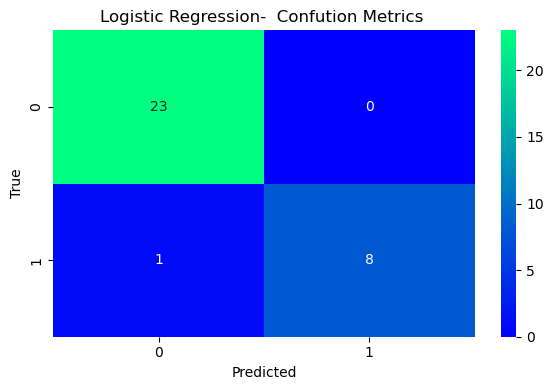

name: Random Forest
Accuracy: 1.00
Precision Score: 1.0


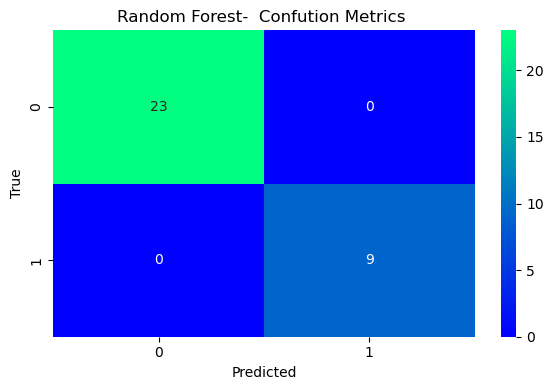

name: Gradient Boosting
Accuracy: 0.97
Precision Score: 1.0


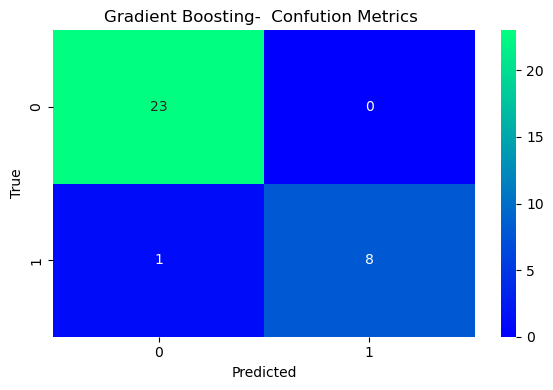

name: SVM
Accuracy: 0.72
Precision Score: 0.0


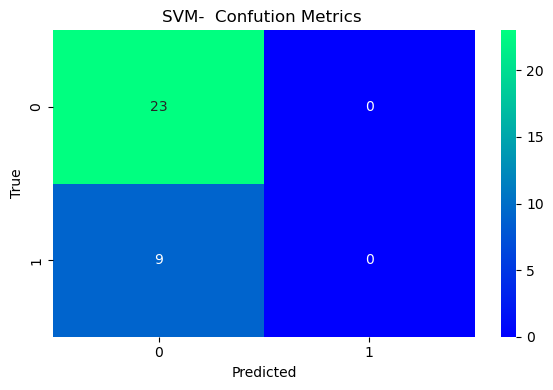

name: K-Nearest Neighbors
Accuracy: 0.75
Precision Score: 0.6


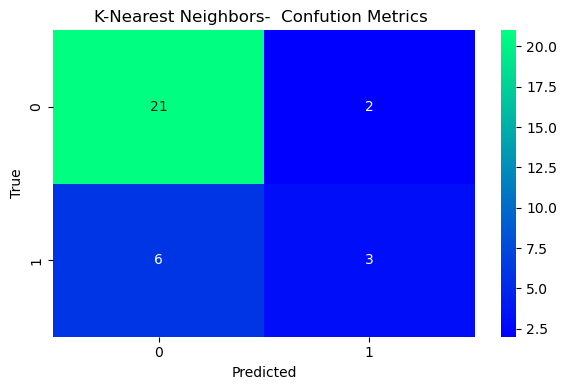

name: Naive Bayes
Accuracy: 0.97
Precision Score: 1.0


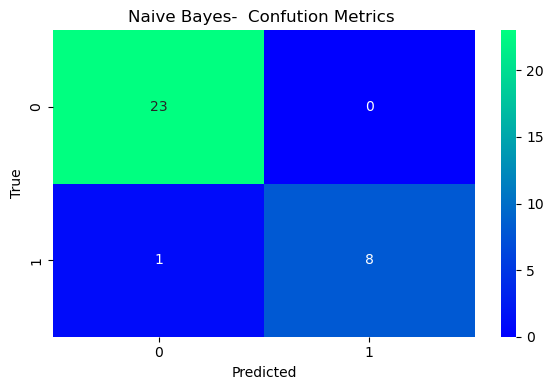

name: Decision Tree
Accuracy: 0.97
Precision Score: 1.0


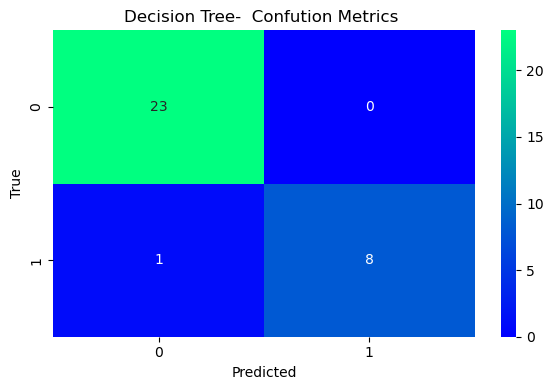


 Summary:


,Model,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.96875,1.0,0.944444,0.959950
1,Random Forest,1.00000,1.0,1.000000,1.000000
2,Gradient Boosting,0.96875,1.0,0.944444,0.959950
3,SVM,0.71875,0.0,0.500000,0.418182
4,K-Nearest Neighbors,0.75000,0.6,0.623188,0.634286
5,Naive Bayes,0.96875,1.0,0.944444,0.959950
6,Decision Tree,0.96875,1.0,0.944444,0.959950


In [162]:
summary = []
for names, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average = 'macro')
    f1 = f1_score(y_test, predictions,  average='macro')
    print(f'name: {names}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision Score: {precision}')

    plt.figure(figsize=(6, 4))
    cm  = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot = True, cmap = 'winter')
    plt.title(f"{names}-  Confution Metrics ")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    summary.append({
        'Model': names,
        'Test Accuracy': accuracy,
        'Precision Score': precision,
        'Recall Score': recall,
        'F1 Score': f1
        
    })
    summary_df = pd.DataFrame(summary)

# Show all model evaluation metrics in one table
print('\n Summary:')
summary_df